In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

# Read the cleaned data

In [2]:
df = pd.read_excel("../haircut_cleanup.xlsx")
df.head()

,Tip amount,Time,Day,Culture,Married,Age
0,0.0,17,Fri,I,NM,30
1,1.0,14,Tue,E,NM,10
2,1.0,19,Tue,I,NM,35
3,2.0,17,Mon,I,NM,35
4,2.0,12,Fri,M,NM,15


Exploring the differences between married and unmarried customers

In [3]:
df.groupby("Married").mean()

,Tip amount,Time,Age
Married,,,
M,6.224359,13.500000,40.910256
NM,6.808442,13.935065,26.896104


<AxesSubplot:xlabel='Married'>

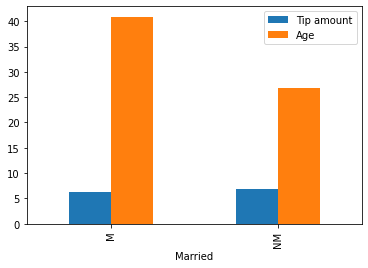

In [4]:
df_no_time = df.drop(columns=["Time"])
df_no_time.groupby("Married").mean().plot.bar()

Exploring the mean tip amount differences for married and unmarried customers, binned by their age.

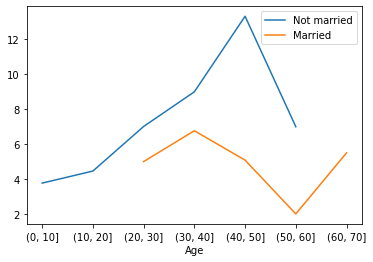

In [5]:
# Married and not married split
df_m = df.drop(df.loc[df["Married"] == "NM"].index)
df_nm = df.drop(df.loc[df["Married"] == "M"].index)

# Binned by age in 10 year intervals
bins = pd.cut(df["Age"], list(range(0, 100, 10)))

df_nm.groupby(bins)["Tip amount"].mean().plot.line()
df_m.groupby(bins)["Tip amount"].mean().plot.line()
plt.legend(["Not married", "Married"])

Exploring if culture has an impact on tip amounts

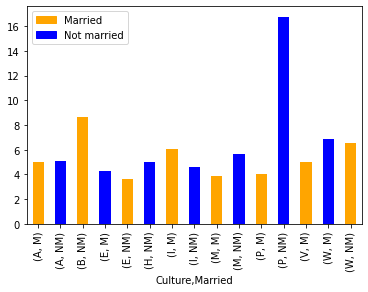

In [6]:
df.groupby(["Culture", "Married"])["Tip amount"].mean().plot.bar(
    color=["orange", "blue"]
)

married_patch = mpatches.Patch(color="orange", label="Married")
not_married_patch = mpatches.Patch(color="blue", label="Not married")
plt.legend(handles=[married_patch, not_married_patch])

Exploring if the time of day has an impact on tip amounts and the age of the customer

<AxesSubplot:xlabel='Time'>

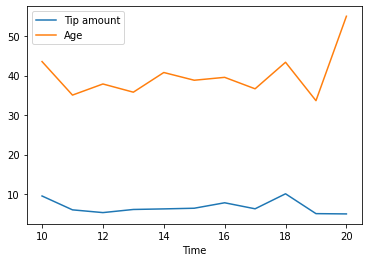

In [7]:
df.groupby("Time").mean().plot.line(stacked=True)